In [16]:
# Import libraries
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from pathlib import Path
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [13]:
# Create a reference to the file. 
file_path = Path("../Data/diseases.sqlite")

In [14]:
# Connect to and read from the database
conn = sqlite3.connect(file_path)
symptoms_df = pd.read_sql_query("SELECT * FROM diseases", conn)
conn.close()

In [19]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df.drop("target", axis=1)
y = iris_df["target"]

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Evaluate the classifier's performance on the testing data
accuracy = rf_classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [33]:
# Specify custom feature names

# List the columns of the DataFrame
columns_list = symptoms_df.columns.tolist()

# Print the list of columns
print('List of Columns:')
print(columns_list)

# Create symptom list
feature_names = ['acidity', 'anxiety', 'bladder_discomfort', 'blurred_and_distorted_vision', 'breathlessness', 'burning_micturition',
            'chest_pain', 'chills', 'congestion', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'depression',
            'dischromic _patches', 'drying_and_tingling_lips', 'excessive_hunger', 'fast_heart_rate', 'fatigue',
            'foul_smell_of urine', 'headache', 'high_fever', 'indigestion', 'irritability', 'itching', 'lethargy',
            'loss_of_appetite', 'loss_of_smell', 'malaise', 'mild_fever', 'muscle_pain', 'nausea', 'nodal_skin_eruptions',
            'palpitations', 'phlegm', 'red_spots_over_body', 'redness_of_eyes', 'runny_nose', 'rusty_sputum', 'shivering',
            'sinus_pressure', 'skin_rash', 'slurred_speech', 'spotting_ urination', 'stiff_neck', 'stomach_pain', 'sweating',
            'swelled_lymph_nodes', 'throat_irritation', 'visual_disturbances', 'vomiting', 'watering_from_eyes', 'Disease']


List of Columns:
['acidity', 'anxiety', 'bladder_discomfort', 'blurred_and_distorted_vision', 'breathlessness', 'burning_micturition', 'chest_pain', 'chills', 'congestion', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'depression', 'dischromic _patches', 'drying_and_tingling_lips', 'excessive_hunger', 'fast_heart_rate', 'fatigue', 'foul_smell_of urine', 'headache', 'high_fever', 'indigestion', 'irritability', 'itching', 'lethargy', 'loss_of_appetite', 'loss_of_smell', 'malaise', 'mild_fever', 'muscle_pain', 'nausea', 'nodal_skin_eruptions', 'palpitations', 'phlegm', 'red_spots_over_body', 'redness_of_eyes', 'runny_nose', 'rusty_sputum', 'shivering', 'sinus_pressure', 'skin_rash', 'slurred_speech', 'spotting_ urination', 'stiff_neck', 'stomach_pain', 'sweating', 'swelled_lymph_nodes', 'throat_irritation', 'visual_disturbances', 'vomiting', 'watering_from_eyes', 'Disease']


In [34]:
# Specify custom class names
class_names = ['Allergy', 'Drug Reaction', 'Migraine', 'Common Cold', 'Pneumonia', 'Heart attack', 'Fungal infection', 'Hypoglycemia', 'Urinary tract infection', 'Chicken pox']

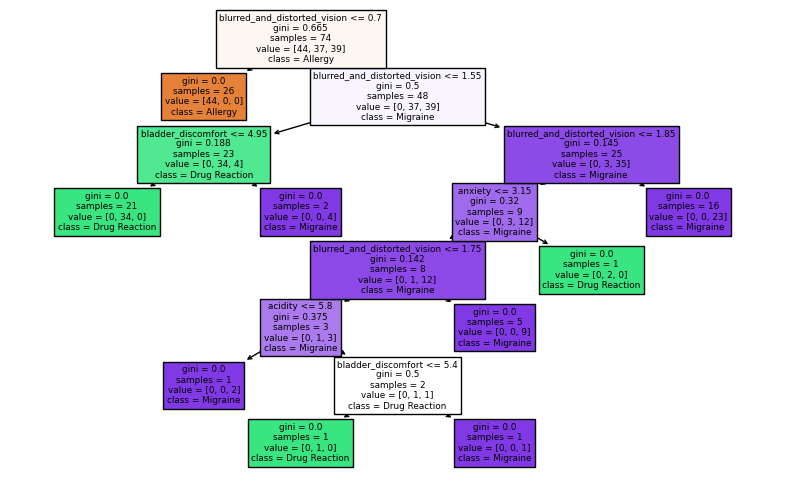

In [36]:
# Plot the first decision tree in the Random Forest
plt.figure(figsize=(10, 6))
plot_tree(rf_classifier.estimators_[0], feature_names=feature_names, class_names=class_names, filled=True)
plt.show()